In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

In [2]:
#fixed parameters
#max capicity of queue
c = 5

#service time number range(Continuous uniform distribution)
S1=15
S2=25

#Arrival time range(Continuous uniform distribution)
A1=1
A2=10

#simulation duration
T=720

In [3]:
def find_free_server():
    result=0
    free_servers=[]
    free_server=0
    for i in range(S):
        if status[i]==0:
            free_servers.append(i)
            result=1
            
    if result==1:
        MIN=SVR[free_servers[0]]
        free_server=free_servers[0]
        for j in range(len(free_servers)):
            if SVR[free_servers[j]]<MIN:
                free_server=free_servers[j]
  
    return(result,free_server)

In [4]:
def entery(c):
    global MTOT
    global FEL
    global status
    global SVR
    global MRET
    global Q
    global ends

    MTOT+=1
    next_entery=[0,0]
    next_entery[1]=np.random.uniform(A1,A2)+Tnow
    next_entery[0]='0'
    FEL.append(next_entery)

    if Q<c:
        server_status=[0,0]
        server_status=find_free_server()
        if server_status[0]==1:
            i=server_status[1]
            status[i]=1
            ST=np.random.uniform(S1,S2)
            ends[i].append(Tnow+ST)
            SVR[i]+=ST
            next_service=[0,0]
            next_service[0]=i
            next_service[1]=Tnow+ST
            FEL.append(next_service)
        else:
            Q+=1
            qeue.append(Tnow)
    else:
        MRET+=1

In [5]:
def end_service(n,c):
    global status
    global Q
    global SVR
    global FEL
    global TWT
    global WT_table
    global x
    
    if Q==0:
        status[n]=0
        
    else:
        if Tnow<T:
            Q=Q-1
            #Waiting time
            WT=Tnow-qeue[0]
            TWT+=WT
            #elimnating time related to previous person in the qeue
            qeue.remove(qeue[0])
            ST=np.random.uniform(S1,S2)
            ends[n].append(Tnow+ST)
            SVR[n]+=ST
            next_service=[0,0]
            next_service[0]=n
            next_service[1]=Tnow+ST
            FEL.append(next_service)

In [6]:
def search_FEL():
    global Tnow
    global FEL
    iminentt=[0,100000]
    
    jj=0
    for j in range(len(FEL)):
        if FEL[j][1]<iminentt[1]:
            iminentt=FEL[j].copy()
            jj=j
    Tnow=iminentt[1]
    FEL[jj][1]=100000
    return(iminentt)

In [7]:
#variables for storing gegnerated information
reject_p=[]
Sworking_p=[]
wait_p=[]

for S in range(1,7):
    #random.seed(10)
    ends=[[] for i in range(S)]
    status=[0 for i in range(S)]
    Tnow=0
    MTOT=0
    MRET=0
    SVR=[0 for i in range(S)]
    TWT=0
    Q=0
    qeue=[]
    FEL=[['0',0]]
    
    #the main controller
    iminent=[0,0]
    while Tnow<T:
        iminent=search_FEL()
        if iminent[0]=='0':
            if iminent[1]>=T:
                continue
            entery(c)
        else:
            n=iminent[0]
            end_service(n,c)
    else:
        #customers who were in the qeue after simulatoin time(T) will be rejected and their waiting time in the qeue will add-
        #-to total waiting time(TWT)
        for ff in range(Q):
            MRET+=1
            WT=T-qeue[ff]
            TWT+=WT
            
        print("\nthe simulation for",S," server finished!\n")
        print("total number of customer= ",MTOT)
        print("total number of rejected customers= ",MRET)
        print("total time of customers waiting= ",TWT)
        print("----------------------------------------------")
        print("rejected customer % = ",MRET/(MTOT)*100)
        reject_p.append(MRET/MTOT*100)
        print("each server working time % :")
        for k in range(len(ends)):
            if not ends[k]==[]:
                if ends[k][-1]>T:
                    SVR[k]=SVR[k]-(ends[k][-1]-T)
            print("    server ",k+1,": ",SVR[k]/T*100," %")
        print("mean server working time %= ",sum(SVR)/T*100/len(SVR)," %")
        Sworking_p.append(sum(SVR)/T*100/len(SVR))
        print("mean waiting time= ",TWT/(MTOT-MRET+len(qeue)))
        wait_p.append(TWT/(MTOT-MRET+len(qeue)))
        print("\n        **************")


the simulation for 1  server finished!

total number of customer=  139
total number of rejected customers=  102
total time of customers waiting=  3419.074241449246
----------------------------------------------
rejected customer % =  73.38129496402878
each server working time % :
    server  1 :  100.0  %
mean server working time %=  100.0  %
mean waiting time=  81.40652955831538

        **************

the simulation for 2  server finished!

total number of customer=  136
total number of rejected customers=  64
total time of customers waiting=  3077.811399921199
----------------------------------------------
rejected customer % =  47.05882352941176
each server working time % :
    server  1 :  100.0  %
    server  2 :  98.92772088706488  %
mean server working time %=  99.46386044353244  %
mean waiting time=  40.49751842001578

        **************

the simulation for 3  server finished!

total number of customer=  131
total number of rejected customers=  21
total time of customers

Text(0, 0.5, 'average WT (p)')

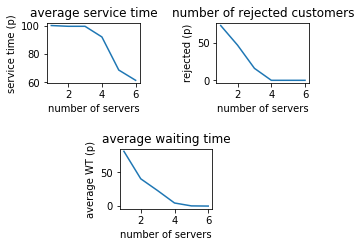

In [13]:
SS=np.array([i+1 for i in range(6)])
plot1=plt.subplot2grid((14,14),(0,0),rowspan=4,colspan=4)
plot2=plt.subplot2grid((14,14),(0,7),rowspan=4,colspan=4)
plot3=plt.subplot2grid((14,14),(8,3),rowspan=4,colspan=4)
plot1.plot(SS,Sworking_p)
plot1.set_title("average service time")
plot1.set_xlabel("number of servers")
plot1.set_ylabel("service time (p)")
plot2.plot(SS,reject_p)
plot2.set_title("number of rejected customers")
plot2.set_xlabel("number of servers")
plot2.set_ylabel("rejected (p)")
plot3.plot(SS,wait_p)
plot3.set_title("average waiting time")
plot3.set_xlabel("number of servers")
plot3.set_ylabel("average WT (p)")

Text(0, 0.5, 'objective function')

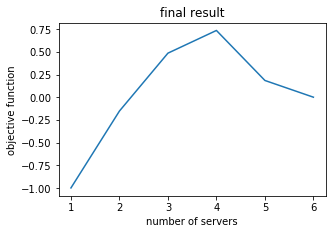

In [14]:
min_wait=min(wait_p)
max_wait=max(wait_p)
rangewait=max_wait-min_wait
scaled_wait=[((wait_p[i]-min_wait)/rangewait) for  i in range(len(wait_p))]
min_Sworking=min(Sworking_p)
max_Sworking=max(Sworking_p)
rangeSworking=max_Sworking-min_Sworking
scaled_Sworking=[((Sworking_p[i]-min_Sworking)/rangeSworking) for  i in range(len(Sworking_p))]
min_reject=min(reject_p)
max_reject=max(reject_p)
rangereject=max_reject-min_reject
scaled_reject=[((reject_p[i]-min_reject)/rangereject) for  i in range(len(reject_p))]
scaled_reject=[((reject_p[i]-min_reject)/rangereject) for  i in range(len(reject_p))]
RESULT=[scaled_Sworking[i]-scaled_reject[i]-scaled_wait[i] for i in range(len(SS))]
plotRESULT=plt.subplot2grid((10,10),(1,1),rowspan=8,colspan=8)
plotRESULT.plot(SS,RESULT)
plotRESULT.set_title("final result")
plotRESULT.set_xlabel("number of servers")
plotRESULT.set_ylabel("objective function")

In [15]:
print("Final Objective function amount is:")
RESULT

Final Objective function amount is:


[-1.0,
 -0.15267222659735058,
 0.4854205048116451,
 0.73558440208567,
 0.18440306184355132,
 0.0]

In [17]:
index=RESULT.index(max(RESULT))
print("the optimal number of servers: ",index+1)

the optimal number of servers:  4
